# Файл Parser.dat

In [1]:
!pwd
!date
!ls

/home/sphere/SIT/Analysis/Baselines
Ср фев 12 20:19:13 MSK 2020
Baselines.ipynb  Parser.dat  Telemetry-Copy1.ipynb
Baselines.txt	 tele.csv    Telemetry.ipynb


In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
from matplotlib import dates
import datetime as dt

In [3]:
plt.rcParams['figure.figsize'] =(8,4)
plt.rcParams['lines.markersize'] = 3.5
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['grid.alpha'] = 0.7
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 14

In [7]:
filename = "Parser.dat"
columns = ['event', 'Ianode', 'Tmos', 'Up', 'fifoerr']
info = pd.read_csv(filename, header = None, index_col=None, sep='\s+', names=columns)
print(info.shape)
info.head()

(1149122, 5)


,event,Ianode,Tmos,Up,fifoerr
0,57069,1.032,17.1,28.27,0
1,57070,1.032,17.1,28.27,0
2,57071,1.032,17.1,28.27,0
3,57072,1.078,17.0,28.25,0
4,57073,1.078,17.0,28.25,0


In [8]:
# Удалить повторы
info = info.drop_duplicates(subset=['event'], keep='first')
print(info.shape)

(1149122, 5)


In [9]:
info.event.value_counts()

57316     1
603251    1
640109    1
646254    1
644207    1
         ..
657386    1
663529    1
661480    1
684007    1
57372     1
Name: event, Length: 1149122, dtype: int64

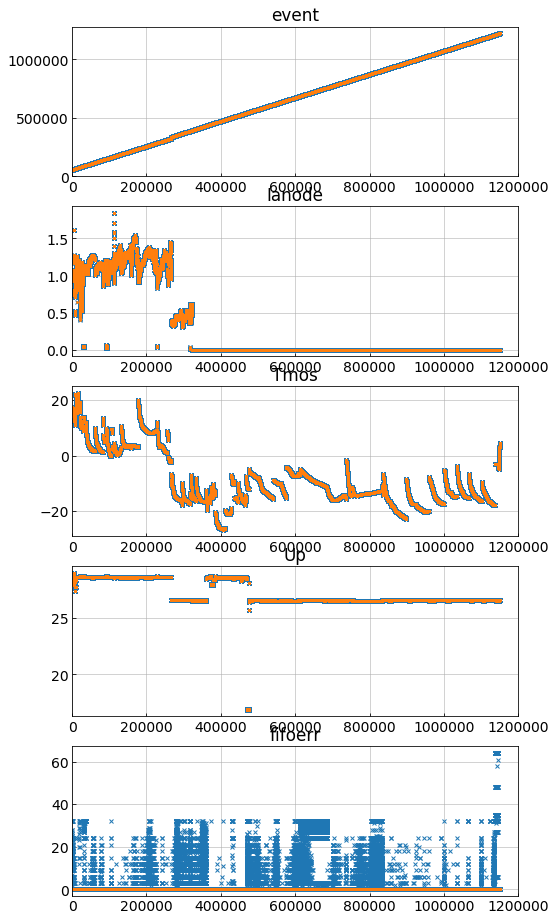

In [50]:
fig, ax = plt.subplots(len(info.columns), 1, sharex=False, figsize=(8, 16))
for i in range(len(info.columns)):
    ax[i].plot(info[columns[i]], 'x')
    ax[i].plot(info0[columns[i]], '.')
    ax[i].set_title(columns[i])
    ax[i].set_xlim(0, 1200000)
    ax[i].grid()    

In [49]:
# Удалить fifo errors
info0 = info[info.fifoerr == 0]
print(info.shape, info0.shape, info.shape[0] - info0.shape[0])

(1149122, 5) (1044611, 5) 104511
